# fuzzy Kmeans
first we import the nessecary libraries.

In [53]:
import pandas as pd
import numpy as np
import random
import operator
import math
import cv2
import matplotlib.pyplot as plt

let's load the image and convert the image into RGB format:

In [54]:
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# print(type(image))

# PCA
since our original image is 3D (width, height and depth of 3 RGB values), we need to flatten the height and width into a single vector of pixels (3 RGB values)

In [55]:
pixel_values_raw = image.reshape((-1, 3))
df=pd.DataFrame(pixel_values_raw)
print(df)
columns = list(df.columns)
# print(len(df))
# print(columns)
n = len(df)
# pixel_values = np.float32(pixel_values)
print(pixel_values_raw.shape)

        0   1   2
0      39  49  38
1      33  43  32
2      29  39  28
3      46  56  45
4      38  48  37
...    ..  ..  ..
65531  44  57  48
65532  43  54  48
65533  41  52  46
65534  41  50  47
65535  40  49  46

[65536 rows x 3 columns]
(65536, 3)


now lets declare nomber of loops iterations ,fuzzy parameter and number of clusters(here we just delare its name further on we give right values to K)

In [115]:
# Number of Clusters
k = None

# Maximum number of iterations
MAX_ITER = 5

# Fuzzy parameter
m = 2.00

for FCM first we need to give random values to our matrix that satysfies our terms like sum of one pixel's belonging to clusters must be 1.

In [57]:
def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

in every loop iterations we must calculate the center of our clusters.for this part we get the average of our points , the average gives us the center of each cluster.

In [58]:
def calculateClusterCenter(membership_mat):
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = list()
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

after we calculate the center of our lusters we should check our pixel's memberships to our clusters so we put right pixels in right clusters in every loop iteration.

In [111]:
def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat


in FUZZY KMEANS on pixel may belong to multiple clusters with diffrent coefficient. so after our loop we need to clearify our pixels memberships so we put every pixel to cluster with highest coefficient.

In [60]:
def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

and now here is our loop of our algorithem.:)

In [112]:
def fuzzyCMeansClustering():
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
#         print(curr)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
#     print(membership_mat)
    return cluster_labels, cluster_centers

this function saves and shows our elbow , we run the program for differnt Ks. and when we detect our elbow (visually) we use that K for our picture.

In [62]:
def show_plt(i,Fig,Image,Centers,Labels):
    Centers_f=Centers[:]
    Labels_f=Labels[:]
    Centers_f = np.uint8(Centers_f)
    Labels_f = np.array(Labels_f).flatten()
    segmented_image = Centers_f[Labels_f.flatten()]
    segmented_image = segmented_image.reshape(Image.shape)
    Fig.add_subplot(5,4, i)
    plt.imshow(segmented_image)

the accuracy function detects the places of each pixel that blongs to each cluster  then it compares 2 pictures labels and finds which cluster in our image reffers to which cluster in our imageplus.
image= un processed image
imageplus= processed image(gave by some deep learning algorithem)
out picture has 65536 pixels

In [108]:
def accuracy(centers,labels,center_comp,labels_comp):
    result_comp=[]
    result=[]
    a=0
    for i in range(9):
        boolarr_comp=(labels_comp==i)
        test=np.where(boolarr_comp)
        result_comp.append(test)
#     print(len(result_comp))
    for i in range(9):
        boolarr=(labels==i)
        test=np.where(boolarr)
        result.append(test)
#     print(len(result))
    for i in range(9):
        max=0.0
#         clus=[]
        for j in range(9):
            num=np.intersect1d(result_comp[i],result[j]).size
            if(max<num):
                max=num
                x=j
        a=a+np.intersect1d(result_comp[i],result[x]).size
#         clus.extend([np.intersect1d(result_comp[i],result[x]).size])
#         print(a)
#     return np.sum(clus)/65536
    return a/65536

# Elbow
here is our ELBOW loop:

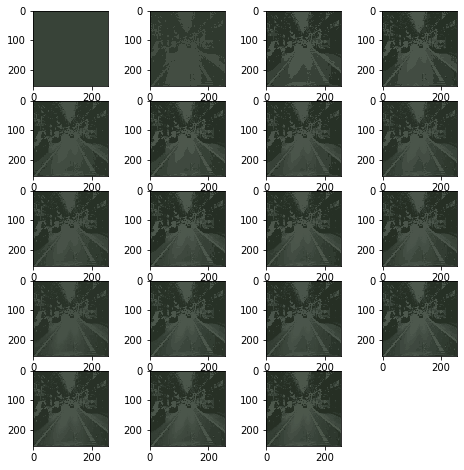

In [64]:
fig=plt.figure(figsize=(8, 8))
for k in range(1,20):
    labels , centers= fuzzyCMeansClustering()
    show_plt(k,fig,image,centers,labels)
plt.show()
# print(labels)
# print(centers)
# print(type(labels))
# print(type(centers))

we've been noticed that 9 clusters is a good K for our problem, so we run the algorithem for that K.

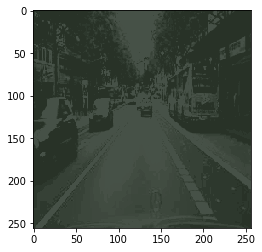

In [67]:
k=9
labels , centers= fuzzyCMeansClustering()
centers = np.uint8(centers)
labels = np.array(labels).flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

here we load and process our imageplus ,the solved image.

In [120]:
k=9
image = cv2.imread("imageplus.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_values_raw = image.reshape((-1, 3))
df=pd.DataFrame(pixel_values_raw)
print(df)
columns = list(df.columns)
n = len(df)
print(pixel_values_raw.shape)

        0   1   2
0       2   1   2
1      23  15  22
2       2   1   2
3       2   1   2
4       2   1   2
...    ..  ..  ..
65531  23  15  22
65532  23  15  22
65533  23  15  22
65534  59  17  57
65535  23  15  22

[65536 rows x 3 columns]
(65536, 3)


we run the algorithem for same K  to test our accuracy.

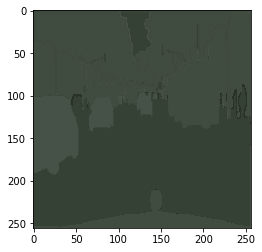

In [121]:
labels_comp , centers_comp= fuzzyCMeansClustering()
centers_comp = np.uint8(centers_comp)
labels_comp = np.array(labels_comp).flatten()
segmented_image = centers[labels_comp.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

our accuracy is not so high because FCM is not capable to find objects correctly and our picture has too many noises.

In [110]:
print("accuracy=",accuracy(centers,labels,centers_comp,labels_comp)*100)

accuracy= 42.63916015625


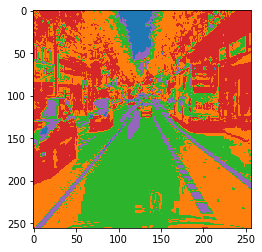

In [115]:
# masked_image = np.copy(image)
# masked_image = masked_image.reshape((-1, 3))
# masked_image[labels == 0] = [31,119,180]
# masked_image[labels == 1] = [255,127,14]
# masked_image[labels == 2] = [44,180,44]
# masked_image[labels == 3] = [214,39,40]
# masked_image[labels == 4] = [148,103,189]
# masked_image = masked_image.reshape(image.shape)
# plt.imshow(masked_image)
# plt.show()